## Installation package ##

In [4]:
# !pip install -r requirements.txt

## Import lib ##

In [58]:
import matplotlib.pyplot as plt
import importlib
import data
importlib.reload(data)
import main
importlib.reload(main)
import seaborn as sns
import pre_pro_treat as pt
importlib.reload(pt)

<module 'pre_pro_treat' from '/Users/nathanrougier/Desktop/3A CENTRALE/Mention/Projet_APPR/ApprAuto/pre_pro_treat.py'>

## Statistiques sur les données ##

In [29]:
df_water = data.get_data(data.config()['data_path'])
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [18]:
df_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

0.0  to  14.0


/Users/nathanrougier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

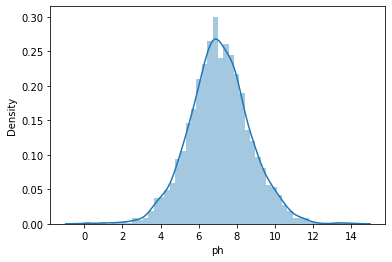

In [19]:
print(df_water['ph'].min()," to ",df_water['ph'].max())

sns.distplot(df_water['ph'])

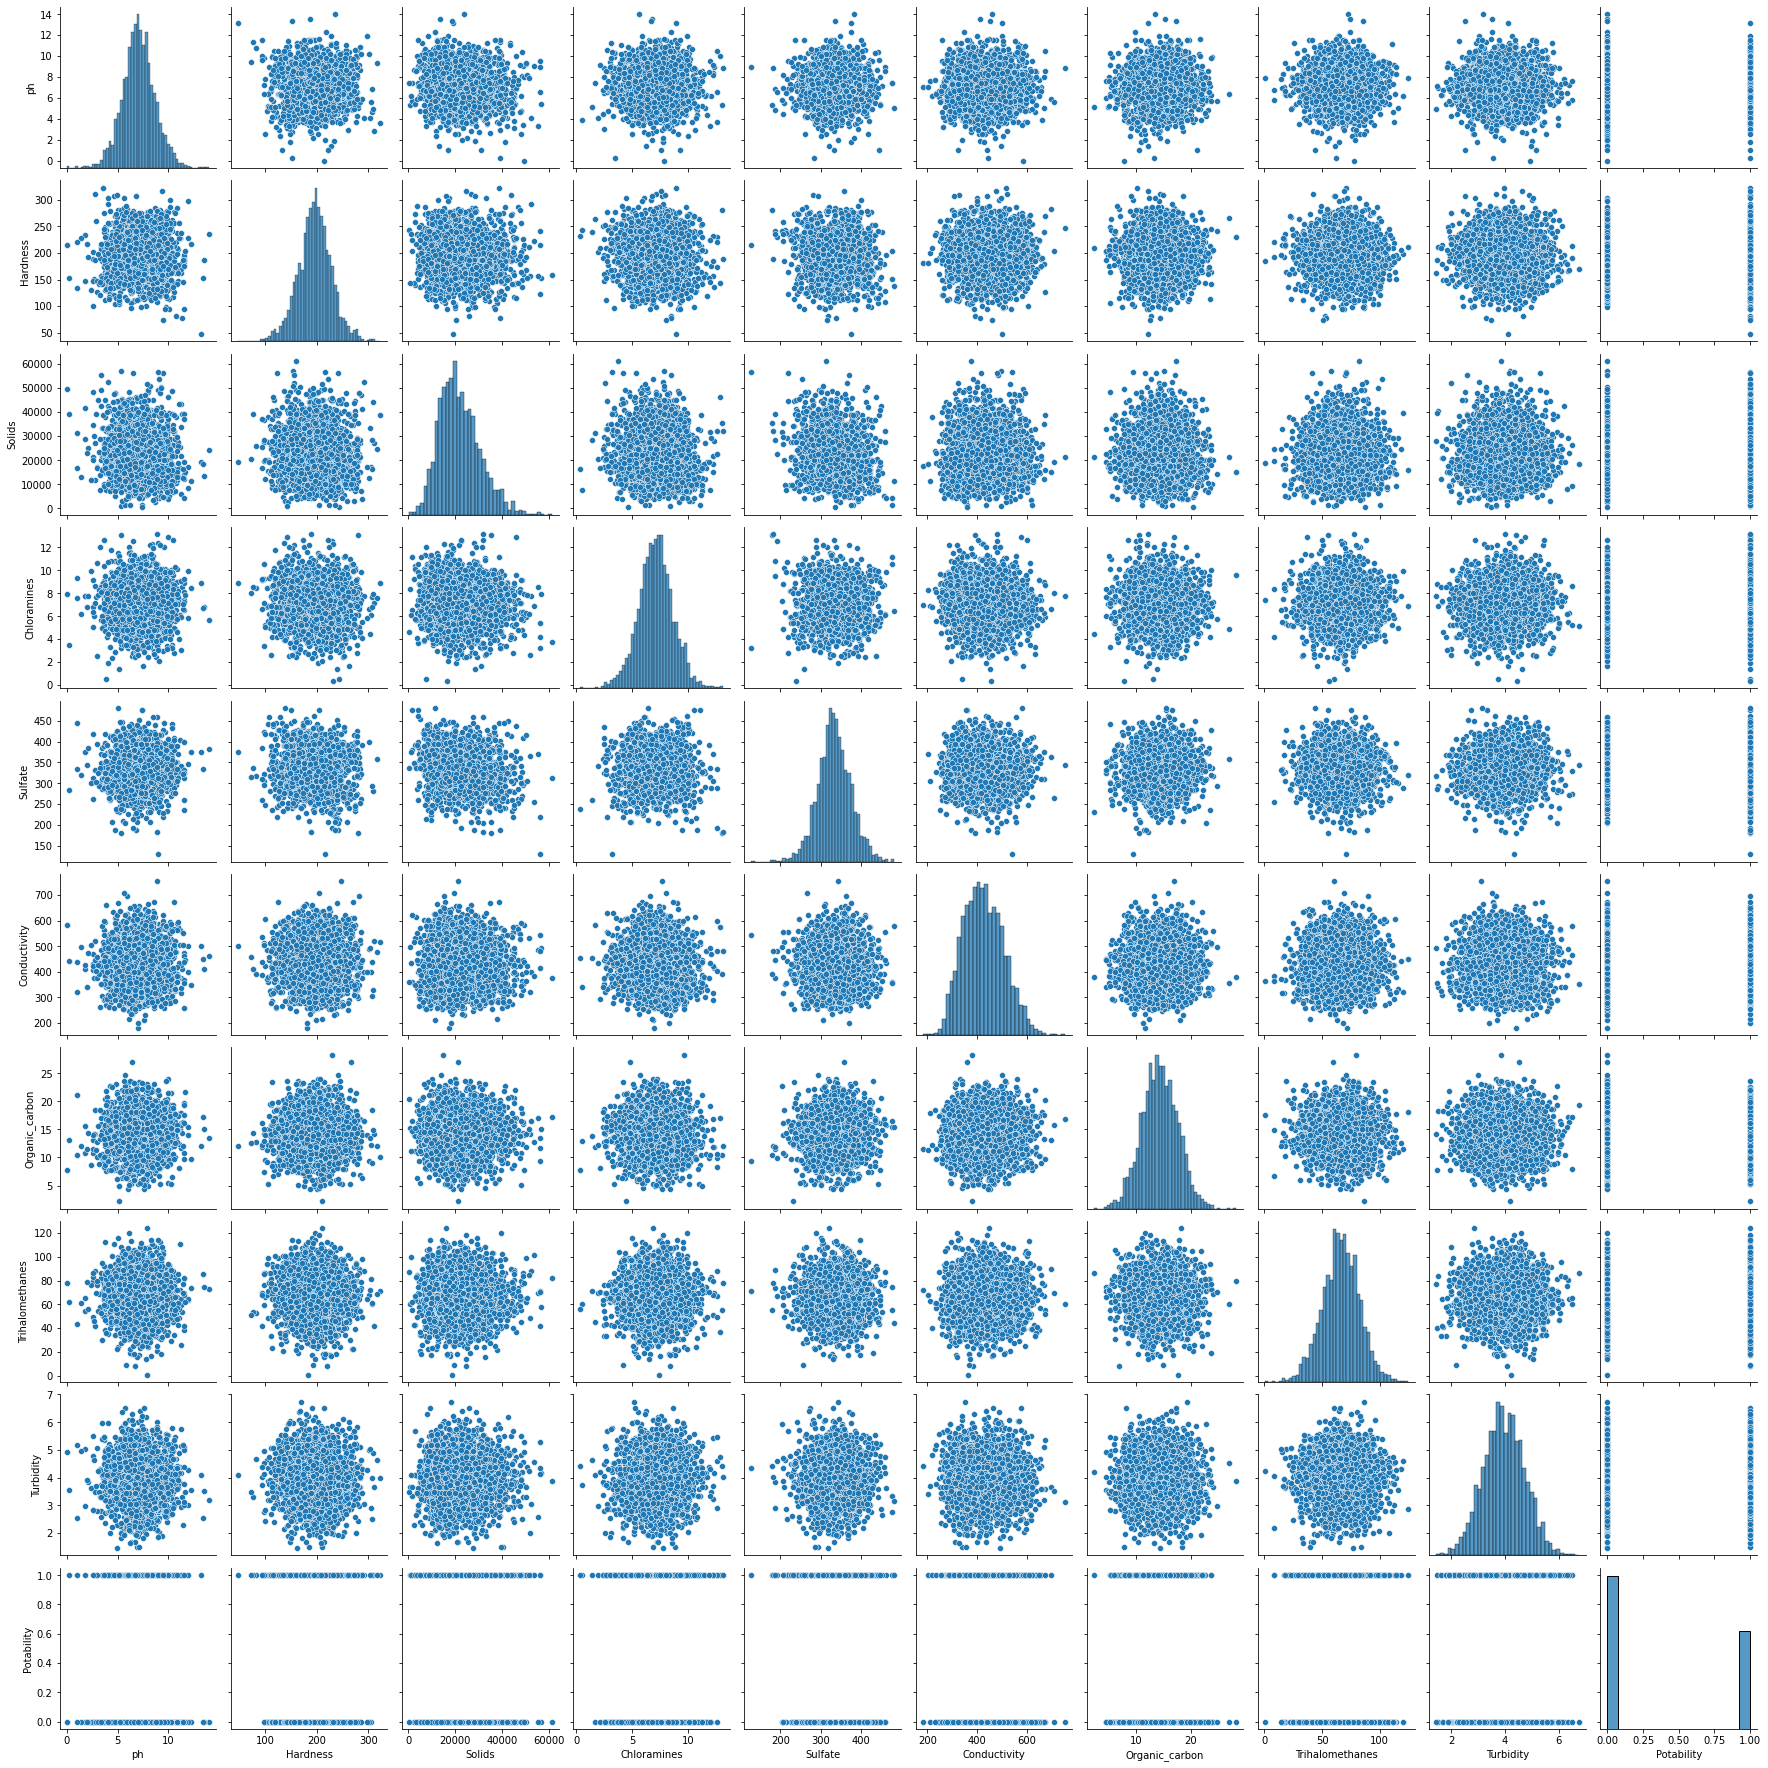

In [20]:
sns.pairplot(data=df_water)

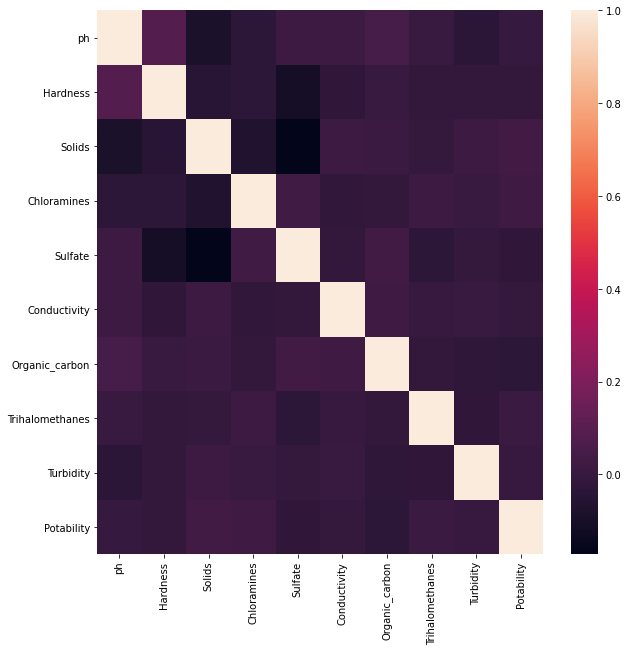

In [25]:
plt.figure(figsize=(10,10))

sns.heatmap(df_water.corr());

## Pre-processing ##

In [61]:
print("df_water.shape = {}".format(df_water.shape))
df_water_no_missing = pt.dropnan(X = df_water)
print("df_water_no_missing.shape = {}".format(df_water_no_missing.shape))


df_water.shape = (3276, 10)
df_water_no_missing.shape = (2011, 10)


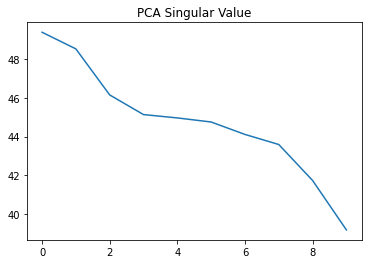

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
pca = PCA(n_components=len(df_water_no_missing.columns))
water_no_missing_pca = pca.fit_transform(scale(df_water_no_missing))
plt.figure
plt.plot(pca.singular_values_)
plt.title('PCA Singular Value')
plt.show()

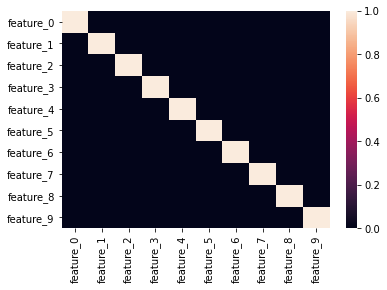

In [78]:
df_water_no_missing_pca = pd.DataFrame(water_no_missing_pca, columns=['feature_{}'.format(i) for i in range(len(df_water_no_missing.columns))])
sns.heatmap(df_water_no_missing_pca.corr());
